In [1]:
import solafune_tools
import rasterio
import glob
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from solafune_tools import settings
from solafune_tools import create_local_catalog_from_scratch
from solafune_tools import get_catalog_items_as_gdf
import geopandas as gpd
import json
from shapely.geometry import Polygon
from shapely.geometry import Point
import torch
import os
from rasterio.features import rasterize

In [2]:
# Directory containing .tif images
input_dir = "./data/train_images"

# Directory to save the masked files
output_dir = "./data/masked_annotations"
os.makedirs(output_dir, exist_ok=True)

# Directory of the annotations
annotations_dir = "./data/train_annotations.json"

In [3]:
with open(annotations_dir, "r") as f:
    labels_loaded = json.load(f)

labels_list = labels_loaded["images"]

In [4]:
labels = {}
for label in labels_list:
    file_name = label["file_name"]
    labels[file_name] = label

In [5]:
class_mapping = {'none':0, 'plantation':1, 'logging':2, 'mining':3, 'grassland_shrubland':4}

In [6]:
from rasterio.transform import Affine

In [7]:
for image_file in os.listdir(input_dir):
    if image_file.endswith(".tif"):
        image_path = os.path.join(input_dir, image_file)
        with rasterio.open(image_path) as src:
            profile = src.profile.copy()
            height, width = src.height, src.width

        label_entry = labels.get(image_file)

        polygons = []
        for ann in label_entry["annotations"]:
            class_label = ann["class"]
            class_value = class_mapping[class_label]
            coords = ann["segmentation"]
            polygon_coords = [(coords[i], coords[i+1]) for i in range(0, len(coords), 2)]
            poly = Polygon(polygon_coords)
            polygons.append((poly, class_value))

        transform = Affine.identity()
        mask = rasterize(
            polygons,
            out_shape=(height, width),
            transform=transform,
            fill=0,
        )

        profile.update({
            "count": 1,    # keep only one band
        })


        mask_path = os.path.join(output_dir, image_file)
        with rasterio.open(mask_path, "w", **profile) as dst:
            dst.write(mask, 1)

        print(f"Saved masked annotation {image_file} to {mask_path}")

Processing train_0.tif with class plantation (1)
(0.0, 449.0, 642.0, 1024.0)
Processing train_0.tif with class plantation (1)
(0.0, 0.0, 711.0, 724.0)
Processing train_0.tif with class plantation (1)
(682.0, 816.0, 873.0, 1001.0)
Saved mask for train_0.tif to ./data/masked_annotations\train_0.tif
Processing train_1.tif with class plantation (1)
(139.0, 330.0, 238.0, 400.0)
Processing train_1.tif with class plantation (1)
(204.0, 235.0, 265.0, 302.0)
Processing train_1.tif with class plantation (1)
(0.0, 121.0, 32.0, 162.0)
Processing train_1.tif with class grassland_shrubland (4)
(0.0, 187.0, 8.0, 202.0)
Processing train_1.tif with class grassland_shrubland (4)
(340.0, 77.0, 367.0, 103.0)
Processing train_1.tif with class grassland_shrubland (4)
(299.0, 93.0, 339.0, 151.0)
Processing train_1.tif with class grassland_shrubland (4)
(304.0, 152.0, 341.0, 176.0)
Processing train_1.tif with class grassland_shrubland (4)
(372.0, 138.0, 419.0, 198.0)
Processing train_1.tif with class grasslan

(1024, 1024)


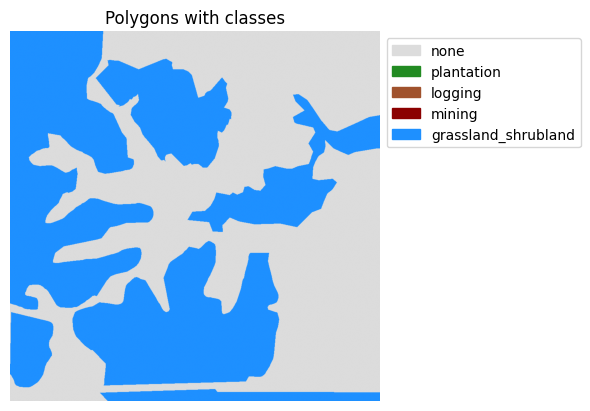

In [12]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

path = './data/masked_annotations/train_3.tif'
src = rasterio.open(path)
mask_data = src.read(1)
print(src.read(1).shape)

colors = ['gainsboro', 'forestgreen', 'sienna', 'darkred', 'dodgerblue']
cmap = mcolors.ListedColormap(colors)

fig, ax = plt.subplots()
im = ax.imshow(mask_data, cmap=cmap, vmin=0, vmax=len(class_mapping)-1)

patches = []
for label, class_val in class_mapping.items():
    patch_color = cmap(class_val)
    patches.append(mpatches.Patch(color=patch_color, label=label))

ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc='upper left')
ax.axis('off')
ax.set_title("Polygons with classes")
plt.show()


In [ ]:
from utils import plot_image

plot_image("train_3.tif",2)

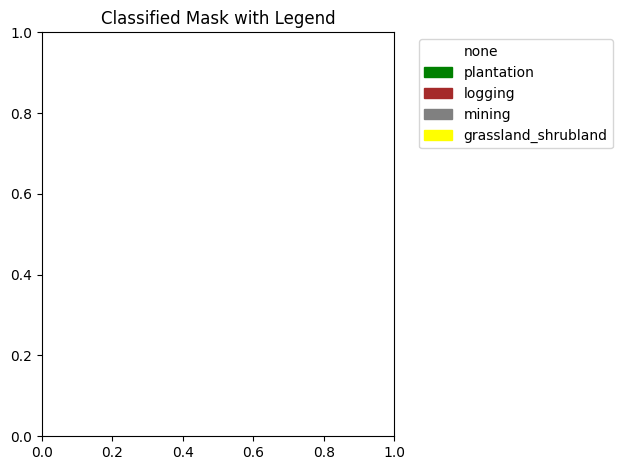

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Your class mapping
class_mapping = {
    'none': 0,
    'plantation': 1,
    'logging': 2,
    'mining': 3,
    'grassland_shrubland': 4
}

src = rasterio.open('./data/masked_annotations/train_0.tif')
mask_data = src.read(1)

# We define a color for each class in the order of their integer value
colors = ['white', 'green', 'brown', 'gray', 'yellow']
cmap = mcolors.ListedColormap(colors)

fig, ax = plt.subplots()
im = ax.imshow(mask_data, cmap=cmap, vmin=0, vmax=len(class_mapping)-1)

# Build a legend with patches corresponding to each class
patches = []
for label, class_val in class_mapping.items():
    # Use cmap(class_val) to get the correct color for that integer
    patch_color = cmap(class_val)
    patches.append(mpatches.Patch(color=patch_color, label=label))

ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("Classified Mask with Legend")
plt.tight_layout()
plt.show()


In [1]:
from utils import plot_masked_image

plot_masked_image("./data/masked_annotations/train_0.tif")

ImportError: cannot import name 'mpatches' from 'matplotlib.patches' (c:\Users\Aurora Ingebrigtsen\source\repos\INF367A-Solafune\.solafuneenv\Lib\site-packages\matplotlib\patches.py)